In [2]:
if (!require("igraph")) install.packages("igraph")
library ("igraph")

Loading required package: igraph

Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



## 1.2(a)

[1] TRUE

[1] 1.998

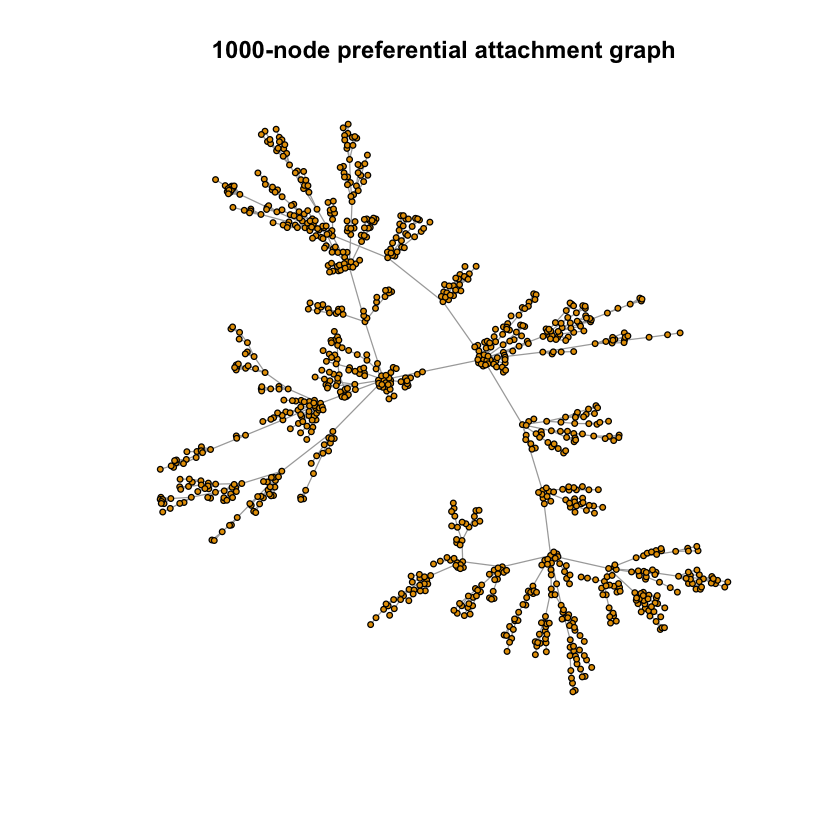

In [23]:
# BA model demo: https://www.youtube.com/watch?v=4GDqJVtPEGg
set.seed(0)
g_1000 <- sample_pa(n = 1000, m = 1, directed = FALSE)
is.connected(g_1000)
mean(degree(g_1000))
g_1000 <- set.graph.attribute(g_1000, "layout", layout.fruchterman.reingold(g_1000))
plot(g_1000, vertex.label="", vertex.size=2, main = "1000-node preferential attachment graph")

## 1.2(b)

In [4]:
c_1000 <- cluster_fast_greedy(g_1000)

In [5]:
# Networks with high modularity have dense connections between the nodes within modules 
# but sparse connections between nodes in different modules. 
# Modularity is often used in optimization methods for detecting community structure in networks.
modularity(c_1000)

[1] 0.9343257

In [43]:
print(length(c_1000))

[1] 32


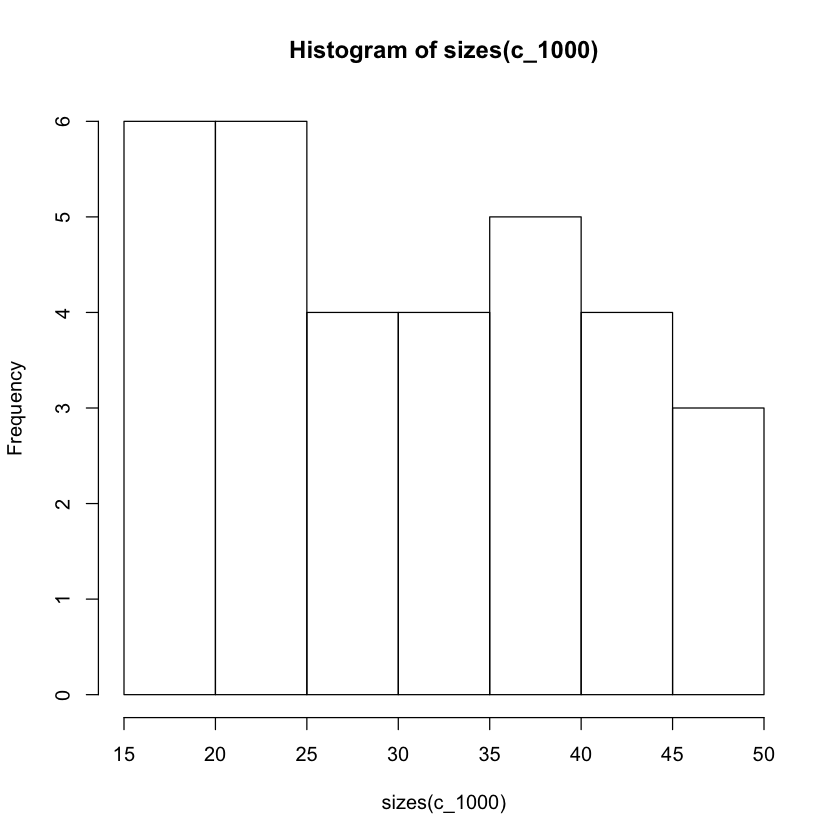

In [45]:
hist(sizes(c_1000))

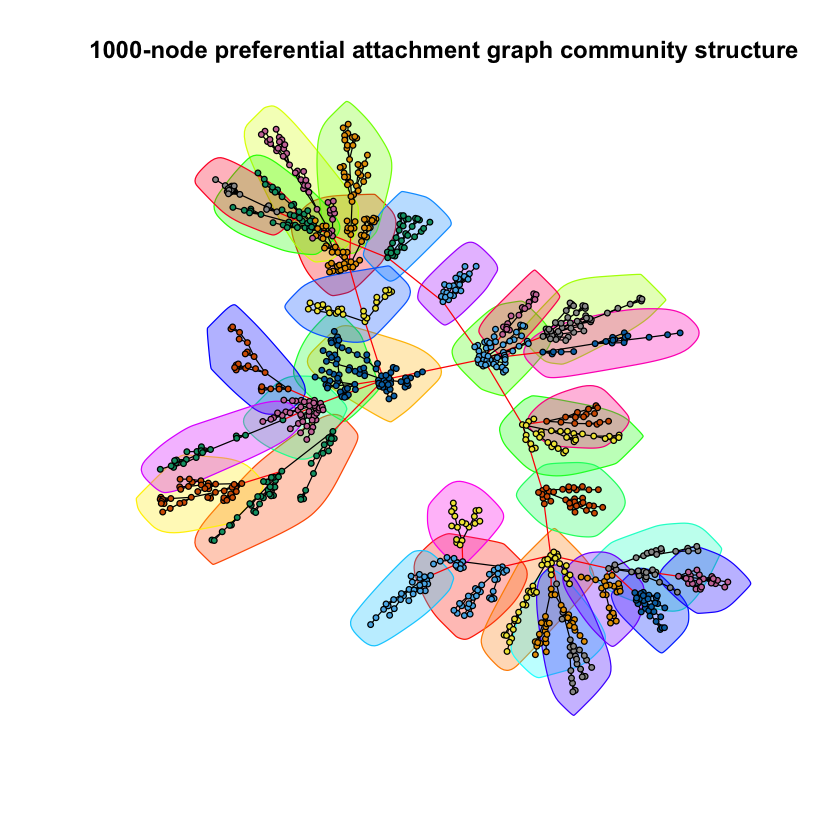

In [24]:
plot(c_1000, g_1000, vertex.label = "", vertex.size = 2, main = "1000-node preferential attachment graph community structure")

## 1.2(c)

In [8]:
set.seed(0)
g_10000 <- sample_pa(n = 10000, m = 1, directed = FALSE)
c_10000 <- cluster_fast_greedy(g_10000)
modularity(c_10000)

[1] 0.9781674

[1] TRUE

[1] 1.9998

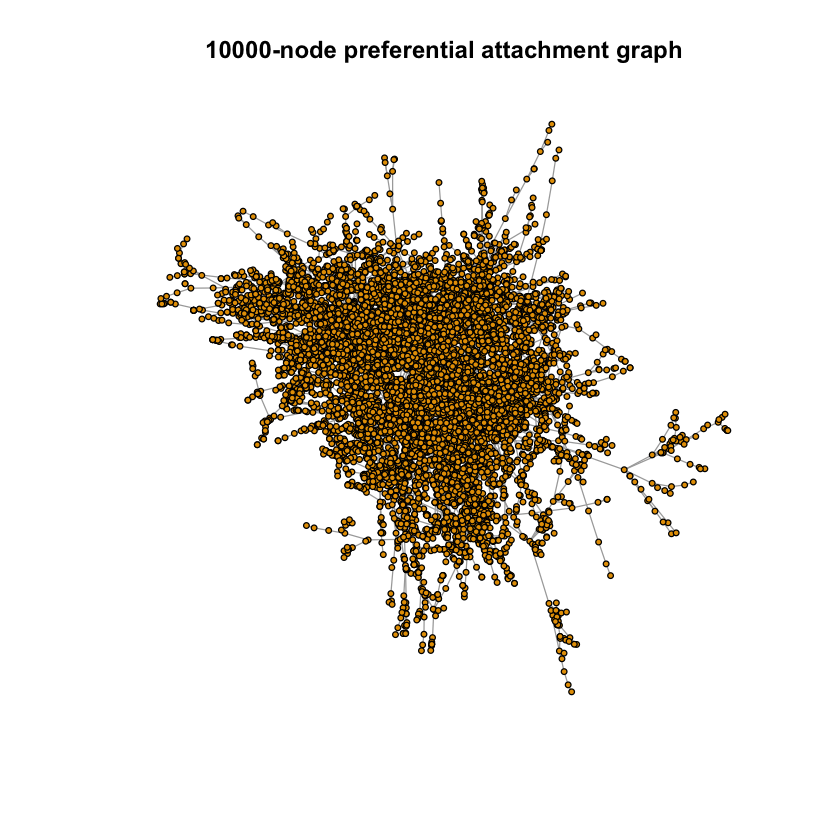

In [25]:
is.connected(g_10000)
mean(degree(g_10000))
g_10000 <- set.graph.attribute(g_10000, "layout", layout.fruchterman.reingold(g_10000))
plot(g_10000, vertex.label="", vertex.size=2, main = "10000-node preferential attachment graph")

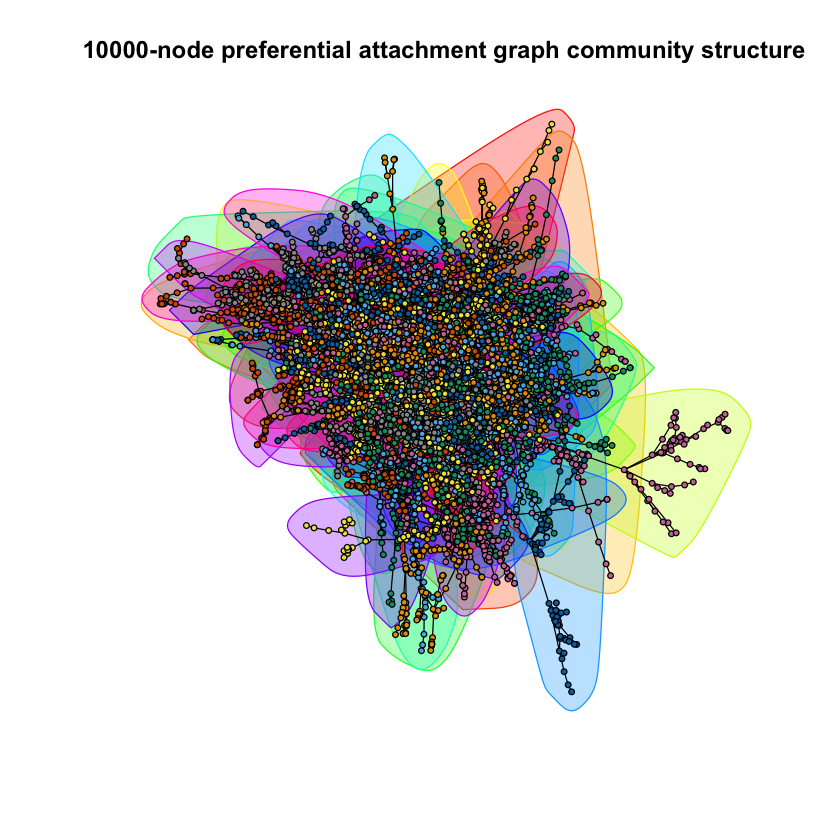

In [26]:
plot(c_10000, g_10000, vertex.label="", vertex.size=2, main = "10000-node preferential attachment graph community structure")

## 1.2(d)

In [11]:
deg_distribution_1000 = degree.distribution(g_1000)
deg_distribution_10000 = degree.distribution(g_10000)


Call:
lm(formula = log_x_1000 ~ log_deg, na.action = na.exclude)

Coefficients:
(Intercept)      log_deg  
     0.9835      -2.6676  



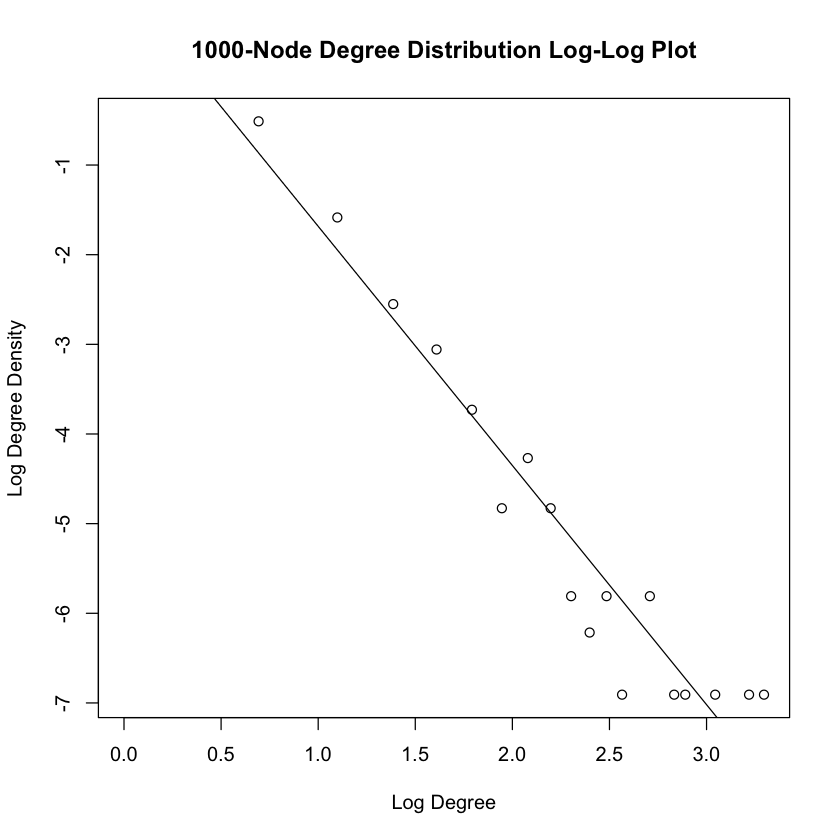

In [15]:
# 1000-node graph
# convert the degree distribution and degree into log scale, and convert the -Inf into NA to avoid log(0)
log_x_1000 <- log(deg_distribution_1000)
log_x_1000[which(log_x_1000 == -Inf)] <- NA

deg <- seq(1, length(log_x_1000))
log_deg <- log(deg)

# linear regression
reg_1000 <- lm(log_x_1000 ~ log_deg, na.action = na.exclude)
print(reg_1000)
plot(x = log_deg, y = log_x_1000, 
     main="1000-Node Degree Distribution Log-Log Plot",
     xlab="Log Degree",ylab="Log Degree Density") 
abline(reg_1000)


Call:
lm(formula = log_x_10000 ~ log_deg, na.action = na.exclude)

Coefficients:
(Intercept)      log_deg  
      1.121       -2.899  



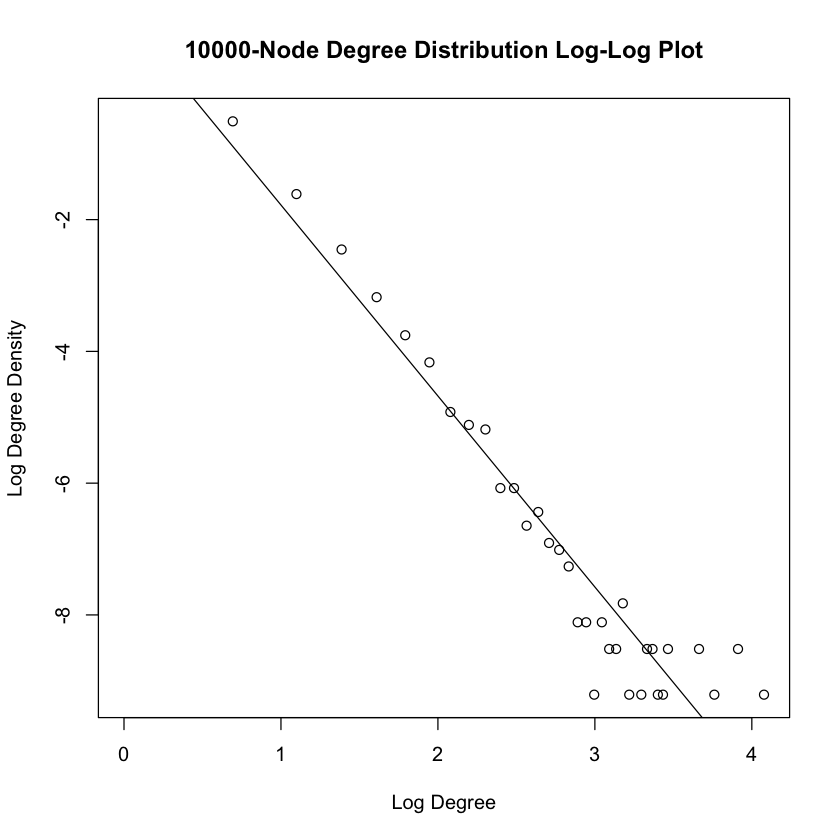

In [16]:
# 10000-node graph
# convert the degree distribution and degree into log scale, and convert the -Inf into NA to avoid log(0)
log_x_10000 <- log(deg_distribution_10000)
log_x_10000[which(log_x_10000 == -Inf)] <- NA

deg <- seq(1, length(log_x_10000))
log_deg <- log(deg)

# linear regression
reg_10000 <- lm(log_x_10000 ~ log_deg, na.action = na.exclude)
print(reg_10000)
plot(x = log_deg, y = log_x_10000, 
     main="10000-Node Degree Distribution Log-Log Plot",
     xlab="Log Degree",ylab="Log Degree Density") 
abline(reg_10000)

## 1.2(e)

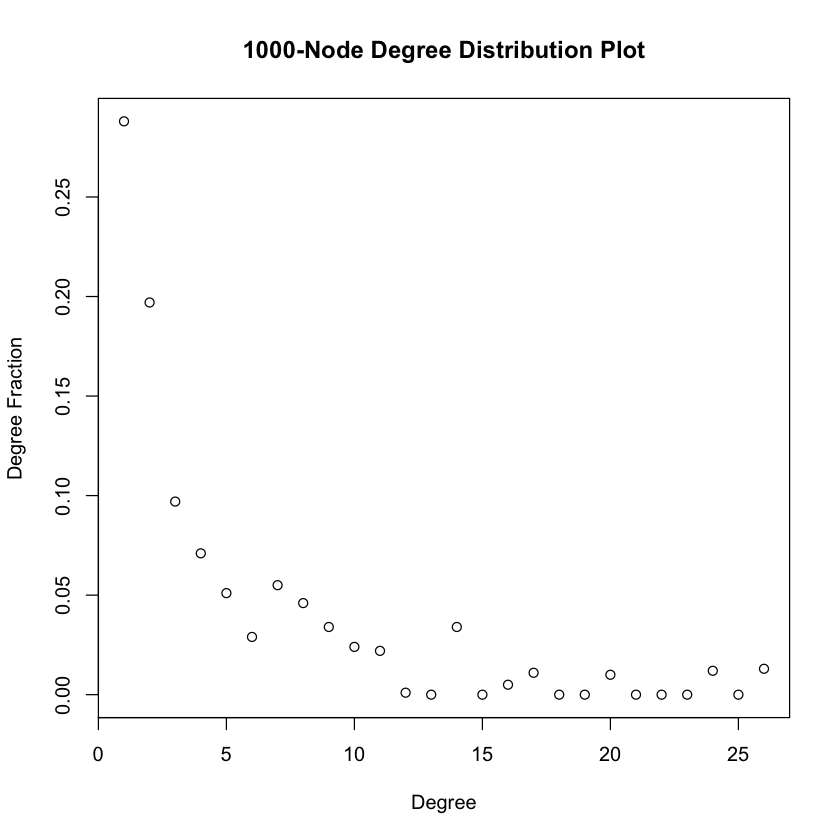

In [19]:
# initiate a vector to store the appearance frequency of each degree
# for a 1000-node graph, the highest degree is max_deg, so the length of the vector is max_deg
# each element of the vector represents the appearance frequency when the degree = element-index
max_deg <- max(degree(g_1000))
j_deg_freq <- c(rep(0,max_deg))

for (k in seq(1,1000)) {
    
    # randomly pick i_node
    i_node <- sample(1:1000, 1)
    i_neighbors <- neighbors(g_1000, i_node)
    
    # from the i_node neighbors randomly pick j_node    
    j_node <- sample(i_neighbors, 1)
    
    # calculate the degree of j_node, and store the appearance in the j_deg_freq 
    j_deg_freq[degree(g_1000, j_node)] <- j_deg_freq[degree(g_1000, j_node)] + 1
}

# calculate the fraction for each degree
j_deg_frac <- j_deg_freq / sum(j_deg_freq)

# all possible degrees of j_node
j_deg <- c(1:max_deg)

plot(x = j_deg, y = j_deg_frac, 
     main="1000-Node Degree Distribution Plot",
     xlab="Degree",ylab="Degree Fraction") 


Call:
lm(formula = log_j_deg_frac ~ log_j_deg, na.action = na.exclude)

Coefficients:
(Intercept)    log_j_deg  
     -1.079       -1.203  



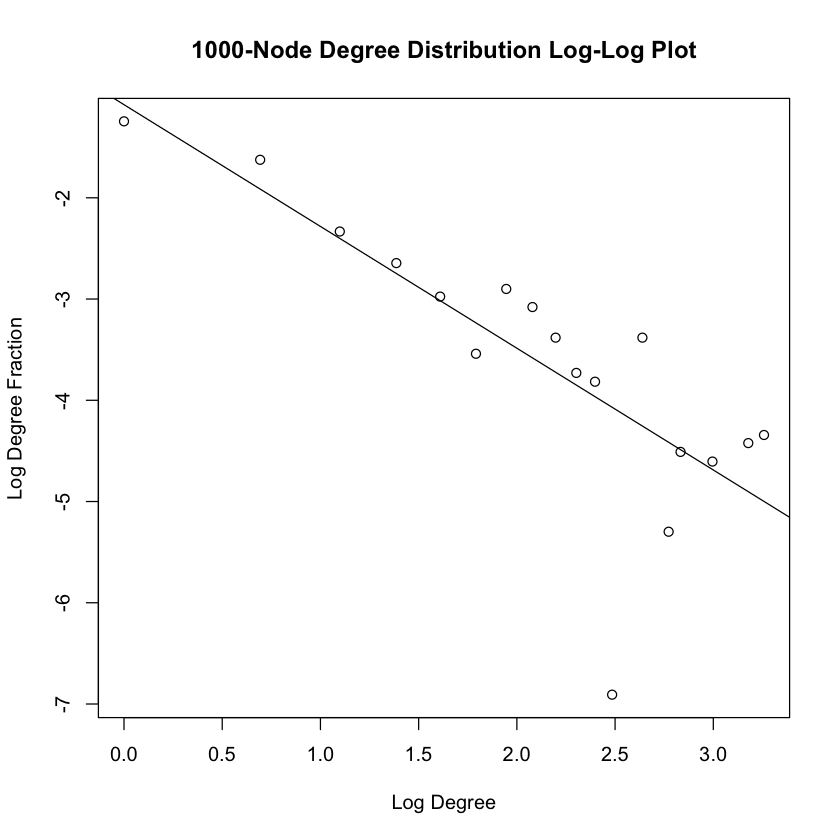

In [20]:
# convert to log scale
log_j_deg <- log(j_deg)
log_j_deg_frac <- log(j_deg_frac)
log_j_deg_frac[which(log_j_deg_frac == -Inf)] <- NA

# linear regression
reg_j_deg <- lm(log_j_deg_frac ~ log_j_deg, na.action = na.exclude)
print(reg_j_deg)

plot(x = log_j_deg, y = log_j_deg_frac, 
     main="1000-Node Degree Distribution Log-Log Plot",
     xlab="Log Degree",ylab="Log Degree Fraction") 
abline(reg_j_deg)

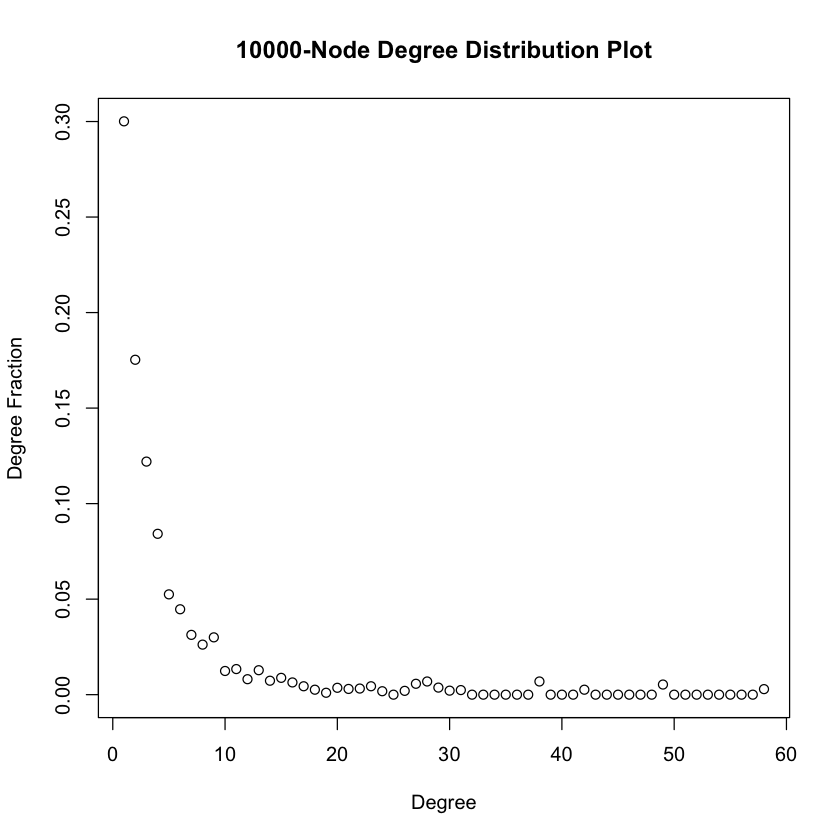

In [21]:
# 10000-node graph
max_deg <- max(degree(g_10000))
j_deg_freq <- c(rep(0,max_deg))

for (k in seq(1,10000)) {
    
    # randomly pick i_node
    i_node <- sample(1:10000, 1)
    i_neighbors <- neighbors(g_10000, i_node)
    
    # from the i_node neighbors randomly pick j_node    
    j_node <- sample(i_neighbors, 1)
    
    # caculate the degree of j_node, and store the appearance in the j_deg_freq 
    j_deg_freq[degree(g_10000, j_node)] <- j_deg_freq[degree(g_10000, j_node)] + 1
}

# calculate the fraction for each degree
j_deg_frac <- j_deg_freq / sum(j_deg_freq)

# all possible degrees of j_node
j_deg <- c(1:max_deg)

plot(x = j_deg, y = j_deg_frac, 
     main="10000-Node Degree Distribution Plot",
     xlab="Degree",ylab="Degree Fraction") 


Call:
lm(formula = log_j_deg_frac ~ log_j_deg, na.action = na.exclude)

Coefficients:
(Intercept)    log_j_deg  
    -0.9812      -1.4057  



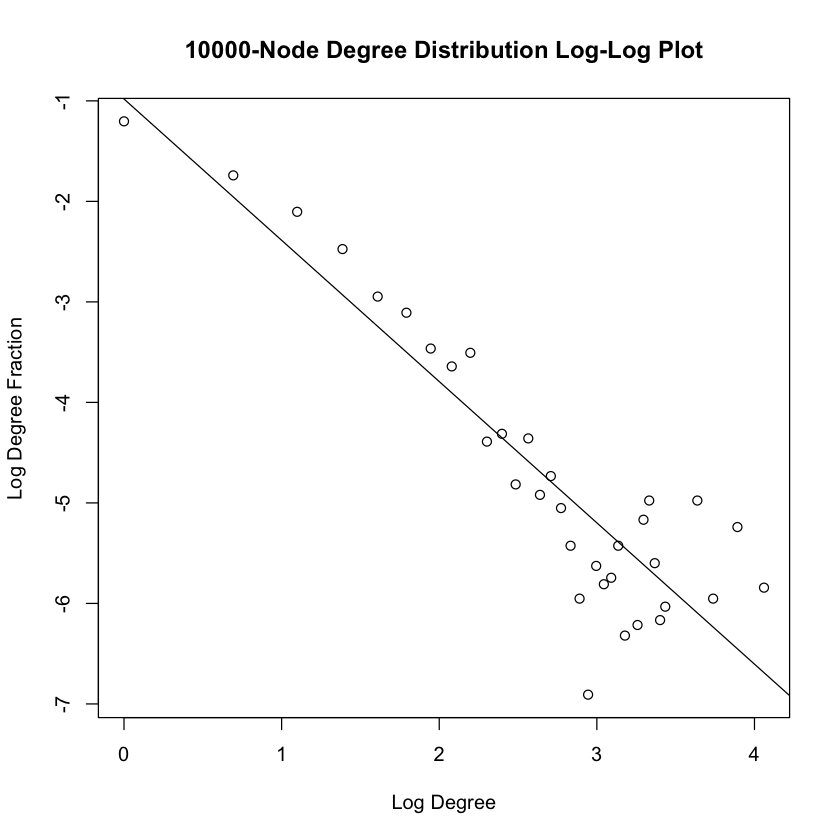

In [22]:
# 10000-node graph
# convert to log scale
log_j_deg <- log(j_deg)
log_j_deg_frac <- log(j_deg_frac)
log_j_deg_frac[which(log_j_deg_frac == -Inf)] <- NA

# linear regression
reg_j_deg <- lm(log_j_deg_frac ~ log_j_deg, na.action = na.exclude)
print(reg_j_deg)

plot(x = log_j_deg, y = log_j_deg_frac, 
     main="10000-Node Degree Distribution Log-Log Plot",
     xlab="Log Degree",ylab="Log Degree Fraction") 
abline(reg_j_deg)

## 1.2(f)

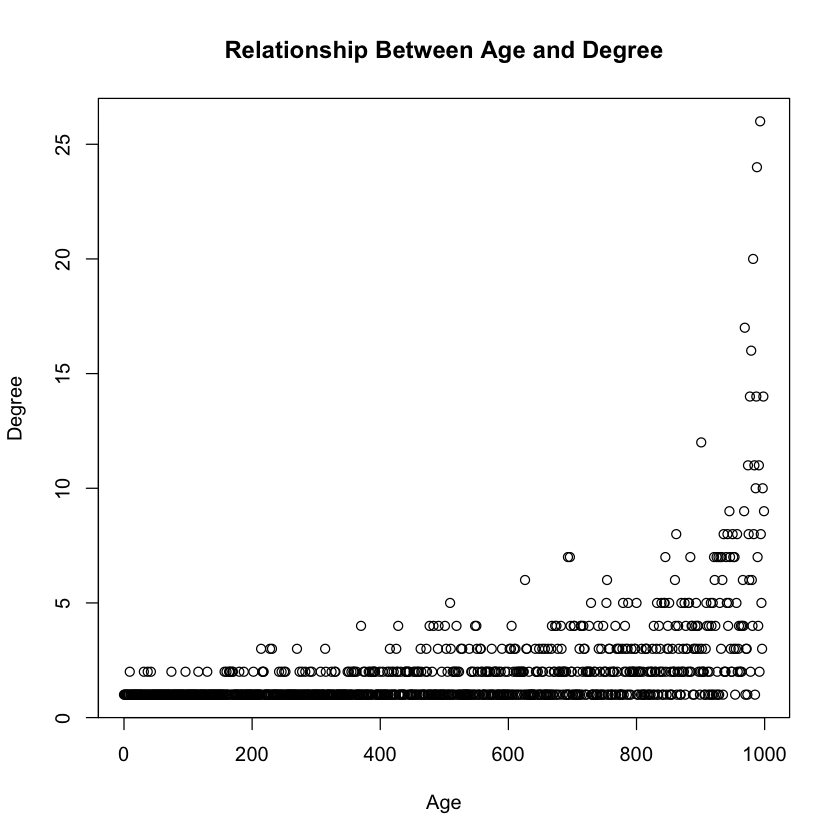

In [27]:
# V(g) returns the vertices sequence of the graph, V(g)[1] is the first node, meaning the oldest node
# so the age of the node is length(V(g)) - V(g)
deg <- degree(g_1000)
age <- length(V(g_1000)) - V(g_1000)
plot(x = age, y = deg,
     main="Relationship Between Age and Degree",
     xlab="Age",ylab="Degree") 


older >> initially get some edges >> degree is higher >> they get even more edges
pagerank is the probability of a node being a hub

In [92]:
# https://www.r-bloggers.com/from-random-walks-to-personalized-pagerank/
adj = as.matrix(as_adjacency_matrix(g_1000))
dim(adj)
row_sum <- t(as.matrix(rowSums(adj)))
dim(row_sum)
matrix(rep(row_sum, 1000), 1000, 1000)


[1] 1000 1000

[1]    1 1000

9,9,9,9,9,9,9,9,9,9,⋯,9,9,9,9,9,9,9,9,9,9
14,14,14,14,14,14,14,14,14,14,⋯,14,14,14,14,14,14,14,14,14,14
10,10,10,10,10,10,10,10,10,10,⋯,10,10,10,10,10,10,10,10,10,10
3,3,3,3,3,3,3,3,3,3,⋯,3,3,3,3,3,3,3,3,3,3
5,5,5,5,5,5,5,5,5,5,⋯,5,5,5,5,5,5,5,5,5,5
8,8,8,8,8,8,8,8,8,8,⋯,8,8,8,8,8,8,8,8,8,8
26,26,26,26,26,26,26,26,26,26,⋯,26,26,26,26,26,26,26,26,26,26
2,2,2,2,2,2,2,2,2,2,⋯,2,2,2,2,2,2,2,2,2,2
11,11,11,11,11,11,11,11,11,11,⋯,11,11,11,11,11,11,11,11,11,11
4,4,4,4,4,4,4,4,4,4,⋯,4,4,4,4,4,4,4,4,4,4
7,7,7,7,7,7,7,7,7,7,⋯,7,7,7,7,7,7,7,7,7,7


## 1.2(g)

In [93]:
set.seed(0)
g_1000_m1 <- sample_pa(n = 1000, m = 1, directed = FALSE)
c_1000_m1 <- cluster_fast_greedy(g_1000_m1)
modularity(c_1000_m1)


[1] 0.9343257

In [95]:
set.seed(0)
g_1000_m2 <- sample_pa(n = 1000, m = 2, directed = FALSE)
c_1000_m2 <- cluster_fast_greedy(g_1000_m2)
modularity(c_1000_m2)


[1] 0.5226493

In [96]:
set.seed(0)
g_1000_m5 <- sample_pa(n = 1000, m = 5, directed = FALSE)
c_1000_m5 <- cluster_fast_greedy(g_1000_m5)
modularity(c_1000_m5)


[1] 0.2823105

In [28]:
set.seed(0)
g_10000_m1 <- sample_pa(n = 10000, m = 1, directed = FALSE)
c_10000_m1 <- cluster_fast_greedy(g_10000_m1)
modularity(c_10000_m1)


[1] 0.9781674

In [29]:
set.seed(0)
g_10000_m1 <- sample_pa(n = 10000, m = 2, directed = FALSE)
c_10000_m1 <- cluster_fast_greedy(g_10000_m1)
modularity(c_10000_m1)


[1] 0.5300333

In [30]:
set.seed(0)
g_10000_m1 <- sample_pa(n = 10000, m = 5, directed = FALSE)
c_10000_m1 <- cluster_fast_greedy(g_10000_m1)
modularity(c_10000_m1)


[1] 0.2790432

## 1.2(h)

In [32]:
g_init <- sample_pa(n = 1000, m = 1, directed = FALSE)
degseq <- degree(g_init)
g_degseq <- sample_degseq(degseq)
g_degseq_community <- walktrap.community(g_degseq)
g_degseq_modularity <- modularity(g_degseq_community)

In [41]:
is.connected(g_degseq)

[1] FALSE

In [46]:
print(length(g_degseq_community))

[1] 225


[1] 0.7506166


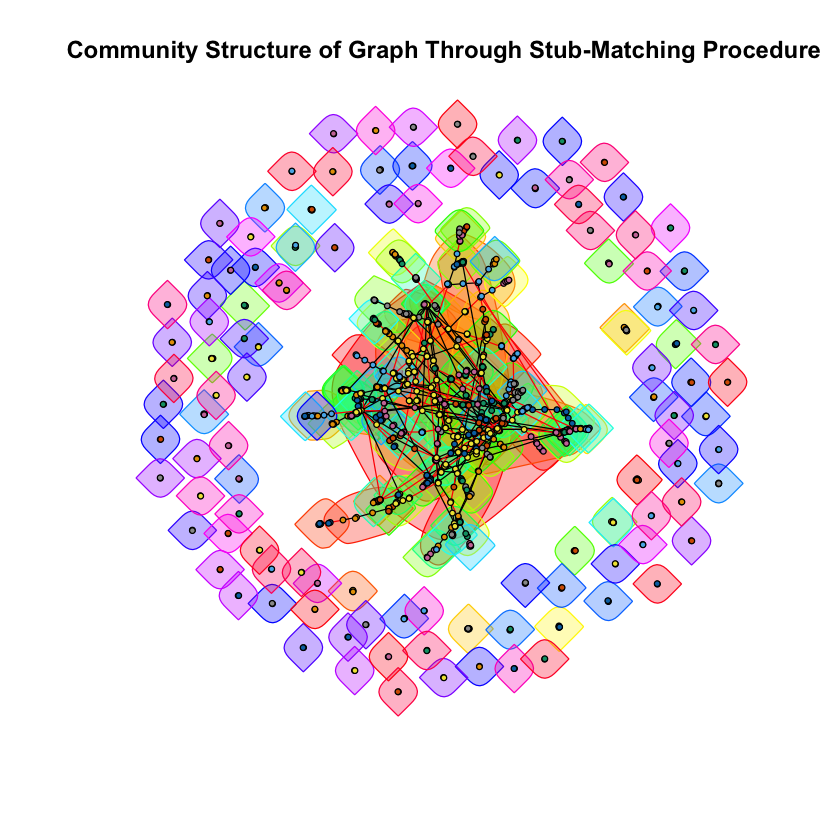

In [34]:
print(g_degseq_modularity)
plot(g_degseq_community, g_degseq, vertex.label = "", vertex.size = 2, main = "Community Structure of Graph Through Stub-Matching Procedure")

## 1.3(a)

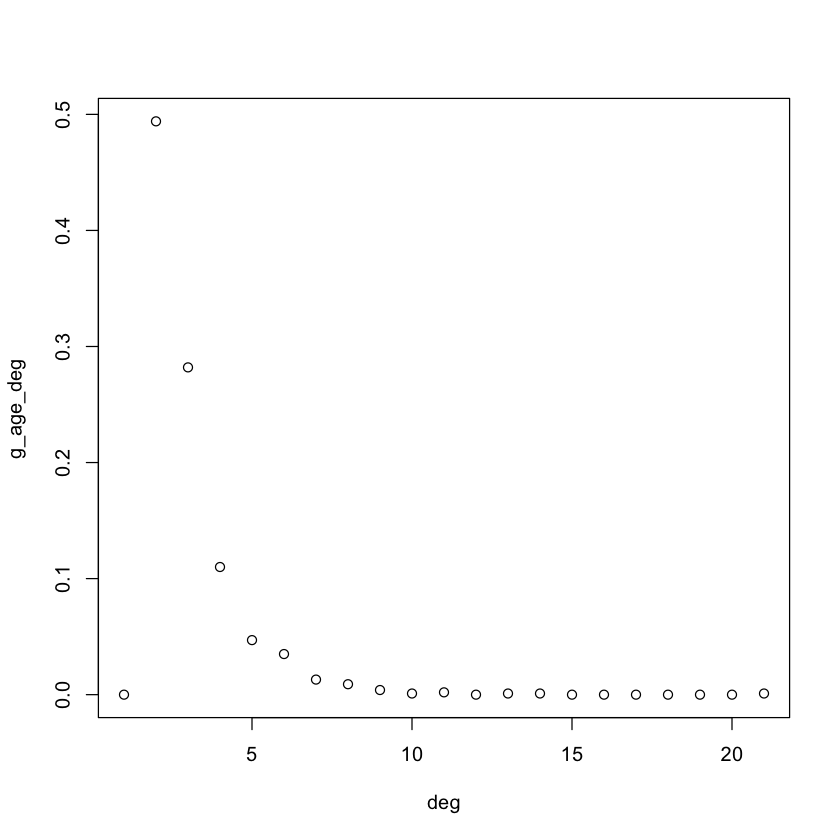

In [36]:
# alpha:pa.exp, beta:aging.exp, 
# a:zero.deg.appeal(default 1), b:zero.age.appeal(default 0), c:deg.coef(default 1), d:age.coef(default 1)
g_age <- sample_pa_age(n = 1000, pa.exp = 1, aging.exp = -1, m = 1, aging.bin = 1000,
  directed = FALSE, zero.deg.appeal = 1, zero.age.appeal = 0,
  deg.coef = 1, age.coef = 1)


g_age_deg <- degree.distribution(g_age)
deg <- seq(1, length(g_age_deg))
plot(x = deg, y = g_age_deg)



Call:
lm(formula = log_g_age_deg ~ log_deg, na.action = na.exclude)

Coefficients:
(Intercept)      log_deg  
      1.986       -3.294  



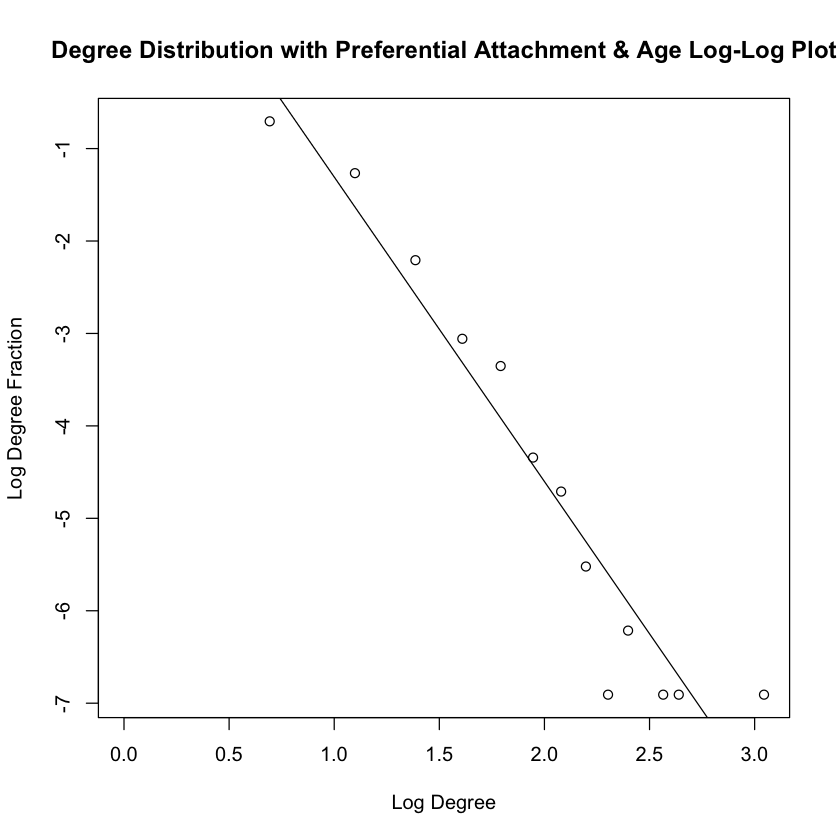

In [39]:
# convert the degree distribution and degree into log scale, and convert the -Inf into NA to avoid log(0)
log_g_age_deg <- log(g_age_deg)
log_g_age_deg[which(log_g_age_deg == -Inf)] <- NA

deg <- seq(1, length(g_age_deg))
log_deg <- log(deg)

# linear regression
reg_age <- lm(log_g_age_deg ~ log_deg, na.action = na.exclude)
print(reg_age)

plot(x = log_deg, y = log_g_age_deg,
     main="Degree Distribution with Preferential Attachment & Age Log-Log Plot",
     xlab="Log Degree",ylab="Log Degree Fraction") 
abline(reg_age)


In [113]:
g_age_deg

[1] 0.000 0.530 0.224 0.112 0.060 0.033 0.025 0.008 0.003 0.002 0.002 0.001

## 1.3(b)

[1] 0.7506166


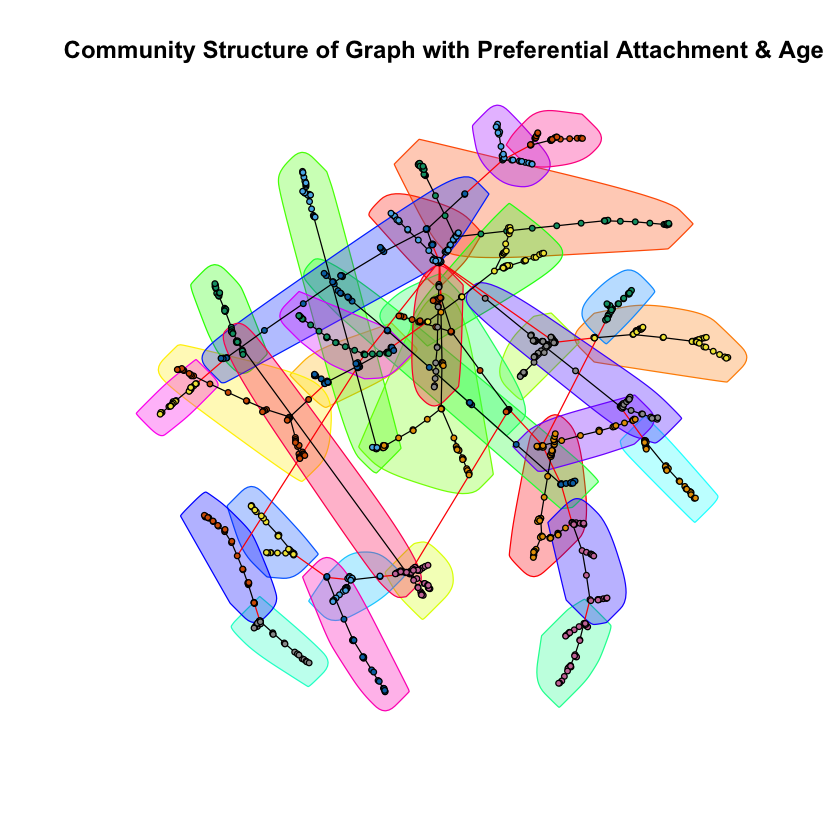

In [40]:
g_age_community <- cluster_fast_greedy(g_age)
g_age_modularity <- modularity(g_age_community)
print(g_degseq_modularity)
plot(g_age_community, g_age, vertex.label = "", vertex.size = 2, main = "Community Structure of Graph with Preferential Attachment & Age")